In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Heart Disease.csv')
df.shape

(319795, 18)

# Removing Duplicate value


In [3]:
df.drop_duplicates(inplace=True)
df.shape

(301717, 18)

In [4]:
df.HeartDisease.value_counts()

No     274456
Yes     27261
Name: HeartDisease, dtype: int64

# Encoding The DataSet with LabelEncoder

In [5]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [6]:
from pandas.core.dtypes.common import is_numeric_dtype
for column in df.columns:
    if is_numeric_dtype(df[column]):
        continue
    else:
        df[column]=label.fit_transform(df[column])

# Separting x and y


In [7]:
x=df.drop('HeartDisease',axis=1)
y=df['HeartDisease']

In [8]:
x

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,1,0,0,3,30,0,0,7,5,2,1,4,5,1,0,1
1,20.34,0,0,1,0,0,0,0,12,5,0,1,4,7,0,0,0
2,26.58,1,0,0,20,30,0,1,9,5,2,1,1,8,1,0,0
3,24.21,0,0,0,0,0,0,0,11,5,0,0,2,6,0,0,1
4,23.71,0,0,0,28,0,1,0,4,5,0,1,4,8,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,1,0,0,7,0,1,1,8,3,2,0,1,6,1,0,0
319791,29.84,1,0,0,0,0,0,1,3,3,0,1,4,5,1,0,0
319792,24.24,0,0,0,0,0,0,0,5,3,0,1,2,6,0,0,0
319793,32.81,0,0,0,0,0,0,0,1,3,0,0,2,12,0,0,0


In [9]:
y

0         0
1         0
2         0
3         0
4         0
         ..
319790    1
319791    0
319792    0
319793    0
319794    0
Name: HeartDisease, Length: 301717, dtype: int32

# Imbalance Data handling


In [10]:
df.HeartDisease.value_counts()

0    274456
1     27261
Name: HeartDisease, dtype: int64

In [11]:
not_HeartDisease=(274456/(274456+27261))*100
HeartDisease=(27261/(274456+27261))*100

In [12]:
print('No HeartDisease {} percent of the total people'.format(not_HeartDisease))

No HeartDisease 90.96471196518591 percent of the total people


In [13]:
print('HeartDisease {} percent of the total people'.format(HeartDisease))

HeartDisease 9.03528803481408 percent of the total people


In [14]:
HeartDisease_no=df[df['HeartDisease']==0]
HeartDisease_yes=df[df['HeartDisease']==1]

In [15]:
HeartDisease_no.shape

(274456, 18)

In [16]:
HeartDisease_yes.shape

(27261, 18)

# So we have to balance our dataset . Now applying Random over sampling techniques


In [17]:
from imblearn.over_sampling import RandomOverSampler
random_over_sampler = RandomOverSampler(random_state =100)

In [18]:
x_new,y_new=random_over_sampler.fit_resample(x,y)
x1_new=x2_new=x3_new=x4_new=x5_new=x6_new=x7_new=x8_new=x9_new=x_new
x_new

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,1,0,0,3,30,0,0,7,5,2,1,4,5,1,0,1
1,20.34,0,0,1,0,0,0,0,12,5,0,1,4,7,0,0,0
2,26.58,1,0,0,20,30,0,1,9,5,2,1,1,8,1,0,0
3,24.21,0,0,0,0,0,0,0,11,5,0,0,2,6,0,0,1
4,23.71,0,0,0,28,0,1,0,4,5,0,1,4,8,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548907,35.43,0,0,0,0,0,0,0,12,5,0,1,4,5,0,0,1
548908,23.01,1,0,0,0,20,0,1,8,5,0,1,4,6,0,0,0
548909,30.80,0,0,0,0,0,0,0,10,4,2,0,2,5,0,0,0
548910,44.63,0,0,0,0,7,1,0,9,2,2,0,2,8,0,0,0


In [19]:
y1_new=y2_new=y3_new=y4_new=y5_new=y6_new=y7_new=y8_new=y9_new=y_new
y_new

0         0
1         0
2         0
3         0
4         0
         ..
548907    1
548908    1
548909    1
548910    1
548911    1
Name: HeartDisease, Length: 548912, dtype: int32

In [20]:
x_new.shape

(548912, 17)

In [21]:
y_new.shape

(548912,)

In [22]:
y_new.value_counts()

0    274456
1    274456
Name: HeartDisease, dtype: int64

# HistGradientBoosting Classifier for holdout cross validation with Randon Over Sampling


In [23]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import HistGradientBoostingClassifier
hgbc=HistGradientBoostingClassifier()

In [24]:
over_xtrain,over_xtest,over_ytrain,over_ytest = train_test_split(x7_new,y7_new,test_size = 0.30 ,random_state =42)
hgbc.fit(over_xtrain,over_ytrain)

HistGradientBoostingClassifier()

In [25]:
OverSampleing_dataset_accuracy7 = hgbc.score(over_xtest,over_ytest)
OverSampleing_dataset_accuracy7

0.7677228949318047

# HistGradientBoostingClassifier for KFold cross validation for Random Over sampling


In [26]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits = 10)

In [27]:
OverSampleingDataset_kfold_result7= cross_val_score(hgbc,x7_new,y7_new,cv = kfold)
OverSampleingDataset_kfold_result7

array([0.69797056, 0.69532901, 0.69497732, 0.70712867, 0.70312073,
       0.76192818, 0.76161848, 0.75996065, 0.76899674, 0.76890565])

In [28]:
OverSampleingDataset_kfold_result7.mean()

0.7319935994979687

# HistGradientBoostingClassifier for StratiFied KFold cross validation for Over sampling


In [29]:
from sklearn.model_selection import StratifiedKFold
Stf_Kfold = StratifiedKFold(n_splits = 10)

In [30]:
OverSampleingDataset_Sf_kfold_result7= cross_val_score(hgbc,x7_new,y7_new,cv = Stf_Kfold)
OverSampleingDataset_Sf_kfold_result7

array([0.76971143, 0.7648109 , 0.7682498 , 0.7630577 , 0.76928823,
       0.75884936, 0.77564628, 0.75762876, 0.77329617, 0.76535315])

In [31]:
OverSampleingDataset_Sf_kfold_result7.mean()

0.7665891776022759

# Now from over sampling ,we calculate all confusion matrix performance


In [32]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,plot_roc_curve
hgbc.fit(over_xtrain,over_ytrain)

HistGradientBoostingClassifier()

In [33]:
pred_y7=hgbc.predict(over_xtest)#Predicted Class 
pred_y7

array([1, 1, 0, ..., 1, 1, 1])

In [34]:
over_ytest

374936    1
319916    1
56188     0
444156    1
170814    0
         ..
285161    0
217312    1
353792    1
318432    1
216193    0
Name: HeartDisease, Length: 164674, dtype: int32

In [35]:
np.array(over_ytest) #actual class/y


array([1, 1, 0, ..., 1, 1, 0])

In [36]:
print(classification_report(over_ytest,pred_y7))

              precision    recall  f1-score   support

           0       0.79      0.72      0.76     82143
           1       0.75      0.81      0.78     82531

    accuracy                           0.77    164674
   macro avg       0.77      0.77      0.77    164674
weighted avg       0.77      0.77      0.77    164674



In [39]:
cm7=confusion_matrix(over_ytest,pred_y7)
cm7

array([[59428, 22715],
       [15388, 67143]], dtype=int64)

# Visualization with heatmap performance of confussion matrix for HistGradientBoosting Classifier


Text(33.0, 0.5, 'Actual Values')

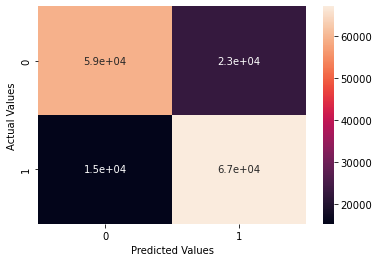

In [40]:
sns.heatmap(cm7,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [41]:
tp,fn,fp,tn=confusion_matrix(over_ytest,pred_y7).reshape(-1)

In [42]:
tp

59428

In [43]:
fn

22715

In [44]:
fp

15388

In [45]:
tn

67143

# Accuracy


In [46]:
(tp+tn)/(tp+tn+fn+fp)

0.768615567727753

In [47]:
#precision
ppv = tp/(tp+fp)
print(ppv)

0.7943220701454234


In [48]:
#Recall
trp = tp/(tp+fn)
print(trp)

0.7234700461390502


In [49]:
#1-Specificity
fpr = fp/(fp+tn)
print(fpr)

0.18645115168845647


In [50]:
#F1-score
f1_score = (2*ppv*trp)/(ppv+trp)
print(f1_score)

0.7572423371708535


In [51]:
#Specificity
tnr = tn/(tn+fp)
print(tnr)

0.8135488483115435


In [52]:
#CSI
csi = tp/(tp+fn+fp)
print(csi)

0.6093242148650173


In [53]:
#FDR
fdr = fp/(tp+fp)
print(fdr)

0.20567792985457656


# Roc and Auc curve for HistGradientingBoosting classifier


C:\Users\WIN\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


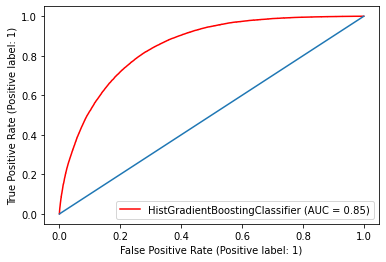

In [54]:
plot_roc_curve(hgbc,over_xtest,over_ytest,color='red')
plt.plot([0,1],[0,1])

# Tunning HistGradientBoosting Classifier Algorithm using Randomized Search CV


In [58]:
loss=['auto','binary_crossentropy','categorical_crossentropy']
max_iter=np.random.randint(15,200,20)
max_depth=np.random.randint(1,12,20)
min_samples_leaf=np.random.randint(1,12,15)

parameters={
    'loss':loss,
    'max_depth':max_depth,
    'min_samples_leaf':min_samples_leaf
}

In [59]:
print(parameters)

{'loss': ['auto', 'binary_crossentropy', 'categorical_crossentropy'], 'max_depth': array([ 1,  7,  3,  8,  9,  3,  7,  7,  2,  5, 10,  2,  9,  9,  2,  1,  8,
       10,  3,  1]), 'min_samples_leaf': array([ 8, 10,  4, 10,  2,  7, 11,  9,  6, 11, 11,  3,  5,  6, 11])}


In [60]:
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
r=RandomizedSearchCV(hgbc,parameters,n_iter=100,cv=3)
r.fit(over_xtrain,over_ytrain)

RandomizedSearchCV(cv=3, estimator=HistGradientBoostingClassifier(), n_iter=100,
                   param_distributions={'loss': ['auto', 'binary_crossentropy',
                                                 'categorical_crossentropy'],
                                        'max_depth': array([ 1,  7,  3,  8,  9,  3,  7,  7,  2,  5, 10,  2,  9,  9,  2,  1,  8,
       10,  3,  1]),
                                        'min_samples_leaf': array([ 8, 10,  4, 10,  2,  7, 11,  9,  6, 11, 11,  3,  5,  6, 11])})

In [61]:
r.cv_results_

{'mean_fit_time': array([ 9.01913102,  0.30048974,  0.29263608, 11.76343528,  6.21613995,
         9.2514383 ,  0.16943638,  0.12451228,  5.62765662,  0.20206801,
         0.18927495,  0.15489546,  0.14299742,  9.52264063, 10.14156326,
         9.61243947,  0.15105422,  9.79176545,  0.15411965,  5.51198888,
         0.14786704,  9.10819411,  0.15485398,  0.12884514,  9.82947699,
         0.16384133,  8.90462653,  8.82812182,  9.56904658,  5.30368519,
         0.16302562,  0.13017352,  8.9134601 ,  0.16760818,  9.61116457,
         9.02993639,  9.95269481,  0.1639177 ,  0.14938577,  0.12773617,
         5.17834552,  0.13420145,  0.12214812,  0.12364252, 11.45681906,
         0.29727586, 11.08716226,  5.79569372,  9.2290434 ,  5.09141787,
         0.14380336,  5.49562478,  0.16315285,  0.15395093,  6.60070546,
         0.13072634,  0.1093897 ,  9.29042673,  4.75243036, 10.07895025,
         5.94316308, 12.0121092 ,  7.76715382, 10.26884468,  0.25217096,
        12.70247618, 12.35970179, 

In [62]:
result=pd.DataFrame(r.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_max_depth,param_loss,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,9.019131,0.251516,2.251246,0.400223,9,9,auto,"{'min_samples_leaf': 9, 'max_depth': 9, 'loss'...",0.766833,0.767409,0.768854,0.767699,0.000850,3
1,0.300490,0.028469,0.000000,0.000000,7,2,categorical_crossentropy,"{'min_samples_leaf': 7, 'max_depth': 2, 'loss'...",NaN,NaN,NaN,NaN,NaN,72
2,0.292636,0.018145,0.000000,0.000000,6,8,categorical_crossentropy,"{'min_samples_leaf': 6, 'max_depth': 8, 'loss'...",NaN,NaN,NaN,NaN,NaN,71
3,11.763435,2.571076,1.916033,0.115170,11,9,auto,"{'min_samples_leaf': 11, 'max_depth': 9, 'loss...",0.766263,0.768042,0.768760,0.767688,0.001049,4
4,6.216140,0.415025,0.714700,0.081501,10,2,binary_crossentropy,"{'min_samples_leaf': 10, 'max_depth': 2, 'loss...",0.758276,0.758774,0.760281,0.759110,0.000852,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,11.293674,1.074891,2.130910,0.168080,5,9,auto,"{'min_samples_leaf': 5, 'max_depth': 9, 'loss'...",0.766162,0.767159,0.767987,0.767103,0.000746,32
96,11.927605,5.444552,3.583856,2.617463,7,7,auto,"{'min_samples_leaf': 7, 'max_depth': 7, 'loss'...",0.766107,0.767284,0.768573,0.767321,0.001007,21
97,14.429387,4.759890,2.061062,0.396581,11,9,auto,"{'min_samples_leaf': 11, 'max_depth': 9, 'loss...",0.765935,0.767456,0.768471,0.767287,0.001042,25
98,0.154813,0.006024,0.000000,0.000000,6,9,categorical_crossentropy,"{'min_samples_leaf': 6, 'max_depth': 9, 'loss'...",NaN,NaN,NaN,NaN,NaN,87


In [63]:
new_r=r.best_estimator_
new_r

HistGradientBoostingClassifier(max_depth=10, min_samples_leaf=10)

In [64]:
new_r.fit(over_xtrain,over_ytrain)

HistGradientBoostingClassifier(max_depth=10, min_samples_leaf=10)

In [65]:
new_r.score(over_xtrain,over_ytrain)

0.7691066474424706